In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

**Importing the dataset**

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/KISHOREVD/Machine_learning-assigments/main/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Encoding the gender column
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.drop(["User ID"],axis=1,inplace=True)

**Splitting the dataset into the Training set and Test set**

In [7]:
X = df.iloc[:,:-1]       
y = df["Purchased"].values  
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X_train.head()

,Gender,Age,EstimatedSalary
108,0,26,86000
248,0,41,52000
126,0,42,65000
336,0,58,144000
24,0,46,23000


**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialisation 
X_train = scaler.fit_transform(X_train) # find the values of mu and sigma
X_test = scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, max_depth =3, max_features='sqrt')
# Train the model on training data
rf.fit(X_train, y_train);
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

**Predicting the Test set results**

In [12]:
r2_score(predictions, y_test)

0.13935569028332773

In [13]:
input=["Gender","Age","EstimatedSalary"]

In [14]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Age                  Importance: 0.56
Variable: EstimatedSalary      Importance: 0.43
Variable: Gender               Importance: 0.01


In [20]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 100, max_depth =5, max_features='auto')
# Extract the two most important features
X=X[["Age","EstimatedSalary"]]
from sklearn.model_selection import train_test_split 
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the random forest
rf_most_important.fit(X_train_imp,y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(X_test_imp)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
r2_score(predictions, y_test)



Mean Absolute Error: 0.15


0.451505402290591

**Making the Confusion Matrix**

In [38]:
y_pred=pd.DataFrame(rf.predict(X_test),columns=["predicted"])

y_pred["predicted"]=np.where(y_pred["predicted"]>0.5,1,0)
y_pred["predicted"]

0     1
1     1
2     1
3     1
4     0
     ..
75    0
76    0
77    0
78    0
79    0
Name: predicted, Length: 80, dtype: int64

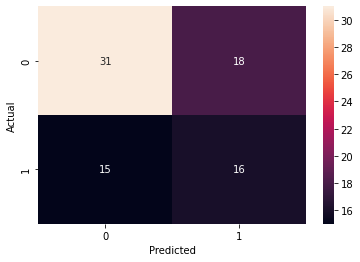

In [39]:
confusion_matrix = pd.crosstab(y_test,y_pred["predicted"], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)